<a href="https://colab.research.google.com/github/savithrik199/DL-projects/blob/main/cellimages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from zipfile import ZipFile

In [ ]:
data="/content/drive/MyDrive/cell_images.zip"

In [ ]:
with ZipFile(data,"r") as zip:
  zip.printdir()
  zip.extractall()

Streaming output truncated to the last 5000 lines.
cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_116.png 2016-07-13 17:52:56        10373
cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_118.png 2016-07-13 17:52:56         9568
cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_126.png 2016-07-13 17:52:56         8513
cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_134.png 2016-07-13 17:52:56        11145
cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_141.png 2016-07-13 17:52:56        11113
cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_168.png 2016-07-13 17:52:58        11492
cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_175.png 2016-07-13 17:52:58        10545
cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_183.png 2016-07-13 17:52:58         9976
cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_221.png 2016-07-13 17:52:58        11303
cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_

In [ ]:
import glob as gb
import tensorflow as tf
import keras
import os
import matplotlib.pyplot as plt



In [ ]:
 base="/content/cell_images/"

In [ ]:
for folder in  os.listdir(base) : 
    files = gb.glob(pathname= str(base +"/"+ folder + "/*.png"))
    print(f' found {len(files)} in folder {folder}')
    

 found 13779 in folder Uninfected
 found 13779 in folder Parasitized


In [ ]:
code={"Uninfected":0,"Parasitized":1}

In [ ]:
pip install pypng


In [ ]:
import png
import tensorflow as tf
import cv2
import numpy as np


In [ ]:

train = []
test= []
for folder in  os.listdir(base) : 
    files = gb.glob(pathname= str( base +'/' + folder + '/*.png'))
    for file in files: 
        images = cv2.resize(cv2.imread(file),(224,224))
        train.append(images)
        test.append(code[folder])
print(f'we have {len(train)} items in training section')
print(f'we have {len(test)} items in testing section')

we have 27558 items in training section
we have 27558 items in testing section


In [ ]:
train[1].shape

(224, 224, 3)

In [ ]:
type(train)

list

In [ ]:
import numpy as np

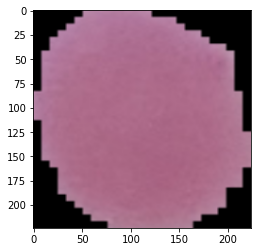

In [ ]:
plt.imshow(train[1])

In [ ]:
train[2].shape

(224, 224, 3)

In [ ]:
train=np.asarray(train)
test=np.asarray(test)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(train,test,test_size=0.2,random_state=10)

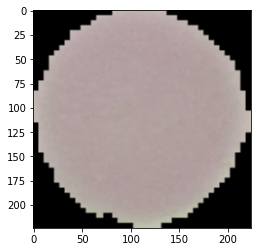

In [ ]:
plt.imshow(x_train[20000])

In [ ]:
type(train)

numpy.ndarray

In [ ]:

    
model1=tf.keras.applications.ResNet50V2(include_top=True,weights='imagenet')
    


In [ ]:
model1.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
_________________________________________________________________________________________

In [ ]:
for la in model1.layers:
  la.trainable=False

In [ ]:
x_train=np.asarray(x_train)
x_test=np.asarray(x_test)
y_train=np.asarray(y_train)
y_test=np.asarray(y_test)

In [ ]:
x_train.shape

(22046, 224, 224, 3)

In [ ]:
y_train.shape

(22046,)

In [ ]:
    
    
    input1=model1.layers[0].input
    reout=model1.layers[-2].output
    predictions=tf.keras.layers.Dense(2)(reout)


In [ ]:
model1.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
_________________________________________________________________________________________

In [ ]:
model2=keras.Model(inputs=input1,outputs=predictions)

In [ ]:
model2.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
model2.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
model2.fit(x_train,y_train,epochs=15,batch_size=200)

Epoch 1/15
111/111 [==============================] - 120s 1s/step - loss: 7.6212 - accuracy: 0.5002
Epoch 2/15
111/111 [==============================] - 119s 1s/step - loss: 7.6212 - accuracy: 0.5002
Epoch 3/15
111/111 [==============================] - 120s 1s/step - loss: 7.6212 - accuracy: 0.5002
Epoch 4/15
111/111 [==============================] - 120s 1s/step - loss: 7.6212 - accuracy: 0.5002
Epoch 5/15
111/111 [==============================] - 120s 1s/step - loss: 7.6212 - accuracy: 0.5002
Epoch 6/15
111/111 [==============================] - 120s 1s/step - loss: 7.6212 - accuracy: 0.5002
Epoch 7/15
111/111 [==============================] - 120s 1s/step - loss: 7.6212 - accuracy: 0.5002
Epoch 8/15
111/111 [==============================] - 120s 1s/step - loss: 7.6212 - accuracy: 0.5002
Epoch 9/15
111/111 [==============================] - 120s 1s/step - loss: 7.6212 - accuracy: 0.5002
Epoch 10/15
111/111 [==============================] - 120s 1s/step - loss: 7.6212 - accura

In [ ]:
model2.evaluate(x_test,y_test)

173/173 [==============================] - 36s 194ms/step - loss: 7.6384 - accuracy: 0.4991


[7.638449192047119, 0.49909287691116333]